           Entre com os dados da 1a simulação           
--------------------------------------------------------
Insira o valor da massa em kg:2
Insira o valor da constante de amortecimento em kg/s:0.5
Insira o valor da constante elástica em N/m:7.2
--------------------------------------------------------
           Entre com os dados da 2a simulação           
--------------------------------------------------------
Insira o valor da massa em kg:1.4
Insira o valor da constante de amortecimento em kg/s:3
Insira o valor da constante elástica em N/m:4
--------------------------------------------------------
Insira a posição inicial p/ a 1a simulação em m:1.4
Insira a posição inicial p/ a 2a simulação em m:1.8
--------------------------------------------------------


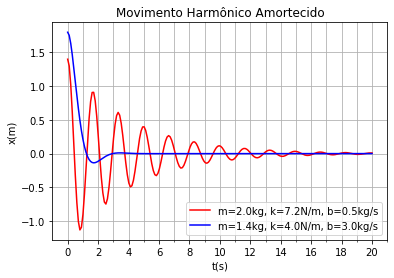

In [2]:
#Centro Universitário FEI - Física II

#Criado por Rafael Galdino Dias em 19/01/2022

#Esse programa tem como principal objetivo auxiliar os alunos em seus estudos de
#Movimento Harmônico Amortecido através da comparação de duas oscilações sob o 
#mesmo gráfico para que o aluno possa visualizar e analisar como os parâmetros
#estudados podem interferir e caracterizar o MHA nas mais diversas situações. 

#Observação: para simular este programa, copie e cole todas as linhas de código
#no Google Colab, onde ele foi testado e desenvolvido pelo autor.

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

print('           Entre com os dados da 1a simulação           ')
print('--------------------------------------------------------')
m1=float(input("Insira o valor da massa em kg:"))
b1=float(input("Insira o valor da constante de amortecimento em kg/s:"))
k1=float(input("Insira o valor da constante elástica em N/m:"))
print('--------------------------------------------------------')
print('           Entre com os dados da 2a simulação           ')
print('--------------------------------------------------------')
m2=float(input("Insira o valor da massa em kg:"))
b2=float(input("Insira o valor da constante de amortecimento em kg/s:"))
k2=float(input("Insira o valor da constante elástica em N/m:"))
print('--------------------------------------------------------')

#Equação diferencial que calcula a posição no MHA. Os termos dx/dt na EDO foram
#substituidos por valores numéricos de um vetor para facilitar o cálculo dentro
#do programa. As equações que iremos utilizar para ambas as simulações são:
def dx_dt1(x, t):
    return [m1*x[1], -b1*x[1] - k1*x[0]]
def dx_dt2(x, t):
    return [m2*x[1], -b2*x[1] - k2*x[0]]

#Definição de um parâmetro de entrada para a posição inicial do MHA, cada valor
#corresponde à uma simulação diferente. 
pos1=float(input("Insira a posição inicial p/ a 1a simulação em m:"))
pos2=float(input("Insira a posição inicial p/ a 2a simulação em m:"))

print('--------------------------------------------------------')

#Definindo o valor da posição inicial para a 1a simulação no gráfico através da 
#aplicação de uma variável x0, onde o movimento deve começar em t=0s.
x0 = [pos1, 0]

#Aqui você pode definir a escala do eixo horizontal do gráfico. Dentro dos 
#parentêses o primeiro valor é o início da sua escala e o segundo valor é o fim
#dela. O terceiro valor é o número de pontos usados para plotar a função.
ts = np.linspace(0, 20, 200)

#Chamada do comando odeint para calcular a solução da EDO. Dentro dos parênteses
#temos a função principal e as variáveis que forma substituidas pelo vetor que 
#representam o termo dx/dt da equação original.  
xs = odeint(dx_dt1, x0, ts)

#Definição da escala vertical do gráfico para a 1a simulação com ínicio em x=0, 
#visto que o eixo y é dependente do valor da posição já definido anteriormente.te.
ys = xs[:,0]

#Definindo o valor da posição inicial para a 2a simulação no gráfico através da 
#aplicação de uma variável x0, onde o movimento deve começar em t=0s.
x1 = [pos2, 0]

#Aqui você pode definir a escala do eixo horizontal do gráfico. Dentro dos 
#parentêses o primeiro valor é o início da sua escala e o segundo valor é o fim
#dela. O terceiro valor é o número de pontos usados para plotar a função.
ts1 = np.linspace(0, 20, 200)

#Chamada do comando odeint para calcular a solução da EDO. Dentro dos parênteses
#temos a função principal e as variáveis que forma substituidas pelo vetor que 
#representam o termo dx/dt da equação original. 
xs1 = odeint(dx_dt2, x1, ts1)

#Definição da escala vertical do gráfico para a 2a simulação com ínicio em x=0, 
#visto que o eixo y é dependente do valor da posição já definido anteriormente.
ys1 = xs1[:,0]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#Aqui você pode alterar a resolução gráfica dos eixos para que fique mais fácil
#vizualizar os pontos de plotagem. Na primeira linha você define o espaçamento 
#entre cada marcação principal do seu gráfico. Dentro dos parênteses o primeiro
#valor e o segundo valor é onde essa resolução começa e onde ela termina, não é 
#preciso mudar estes valores pois esta faixa de tempo abrange todas as situações
#e o terceiro valor é a resolução da escala principal do eixo x do seu gráfico.
major_ticks_x = np.arange(0, 100, 2)

#Na segunda linha é definido o espaçamento entre cada marcação secundária do seu
#gráfico. Dentro dos parênteses o primeiro e segundo valor seguem a mesma regra
#e o terceiro valor é a resolução da escala secundária do eixo x do seu gráfico.
minor_ticks_x = np.arange(0, 100, 1)

#Aplicando os valores de escala definidos pelo usuário com o comando set para as
#marcações definidas no primário e secundário do eixo x. 
ax.set_xticks(major_ticks_x)
ax.set_xticks(minor_ticks_x, minor=True)
ax.grid(which='both')

#Aqui você pode alterar o nome do eixo horizontal do gráfico
plt.xlabel("t(s)")

#Aqui você pode alterar o nome do eixo vertical do gráfico
plt.ylabel("x(m)")

#Aqui você pode alterar o título do gráfico
plt.title("Movimento Harmônico Amortecido")

#Aqui você pode desativar o grid do gráfico digitando False no lugar de True
plt.grid(True)

#Aqui você pode definir os parâmetros de plotagem do gráfico e ajustar estilos 
#de linha diferentes para a função. Dentro dos parentêses o primeiro valor é a 
#definição do eixo x do gráfico e o segundo valor é o eixo y dele. O terceiro e 
#o quarto valor são referentes à cor da linha e sua espessura, respectivamente.
#O quinto item diz respeito à aplicação da legenda do gráfico onde se encontram 
#as informações da massa, constante elástica e ângulo de fase da 1a simulação.
plt.plot(ts,ys,color='red',linewidth=1.5,label='m=%.1fkg, k=%.1fN/m, b=%.1fkg/s' %(m1,k1,b1));

#Aqui você pode definir os parâmetros de plotagem do gráfico e ajustar estilos 
#de linha diferentes para a função. Dentro dos parentêses o primeiro valor é a 
#definição do eixo x do gráfico e o segundo valor é o eixo y dele. O terceiro e 
#o quarto valor são referentes à cor da linha e sua espessura, respectivamente.
#O quinto item diz respeito à aplicação da legenda do gráfico onde se encontram 
#as informações da massa, constante elástica e ângulo de fase da 2a simulação.
plt.plot(ts1,ys1,color='blue',linewidth=1.5,label='m=%.1fkg, k=%.1fN/m, b=%.1fkg/s' %(m2,k2,b2));

#Aqui você pode definir a visualização da legenda do gráfico e ajustá-la para a
#posição que você desejar. Para ver outras opções de posicionamento procure na 
#internet por pyplot.legend
plt.legend(loc=4)

#Habilitação da visualização do gráfico
plt.show()